In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Import the data
lending_data = pd.read_csv('Resources/lending_data.csv')
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Exploring Data (Dataset Characteristics)


In [4]:
lending_data.shape

(77536, 8)

In [5]:
lending_data.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [6]:
# Checking the number of occurrences per target value(loan_status)
lending_data['loan_status'].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [7]:
# loan_status values shows that  data is not blanced so should be scaled

In [8]:
# Create X (features) and y (target) sets
X = lending_data.drop("loan_status", axis=1)
y = lending_data['loan_status'].values


In [9]:
# X and y Shapes
print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


### ploting the data

loan_size


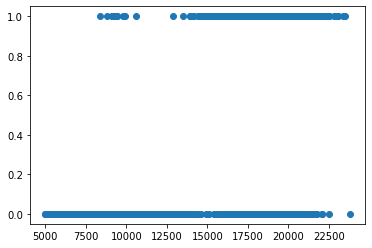

interest_rate


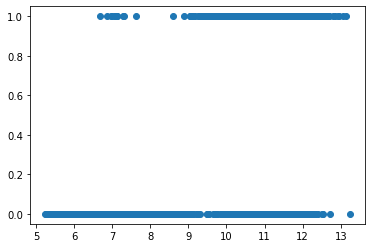

borrower_income


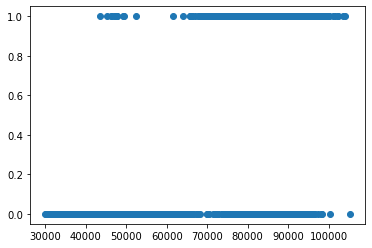

debt_to_income


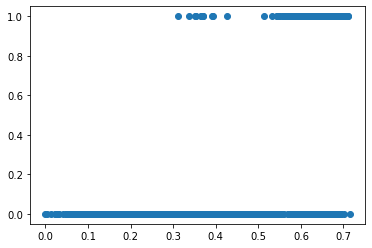

num_of_accounts


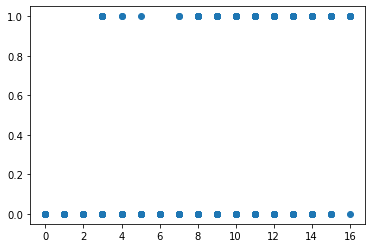

derogatory_marks


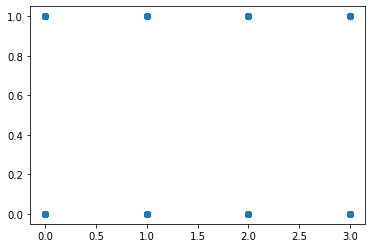

total_debt


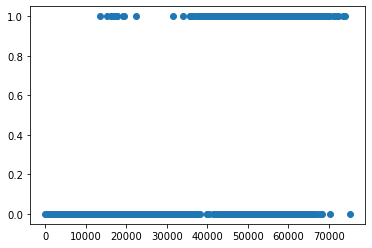

In [10]:
for col in X.columns:
    print(col)
    plt.scatter(X[col], y)
    plt.show()

In [11]:
# using seaborn 


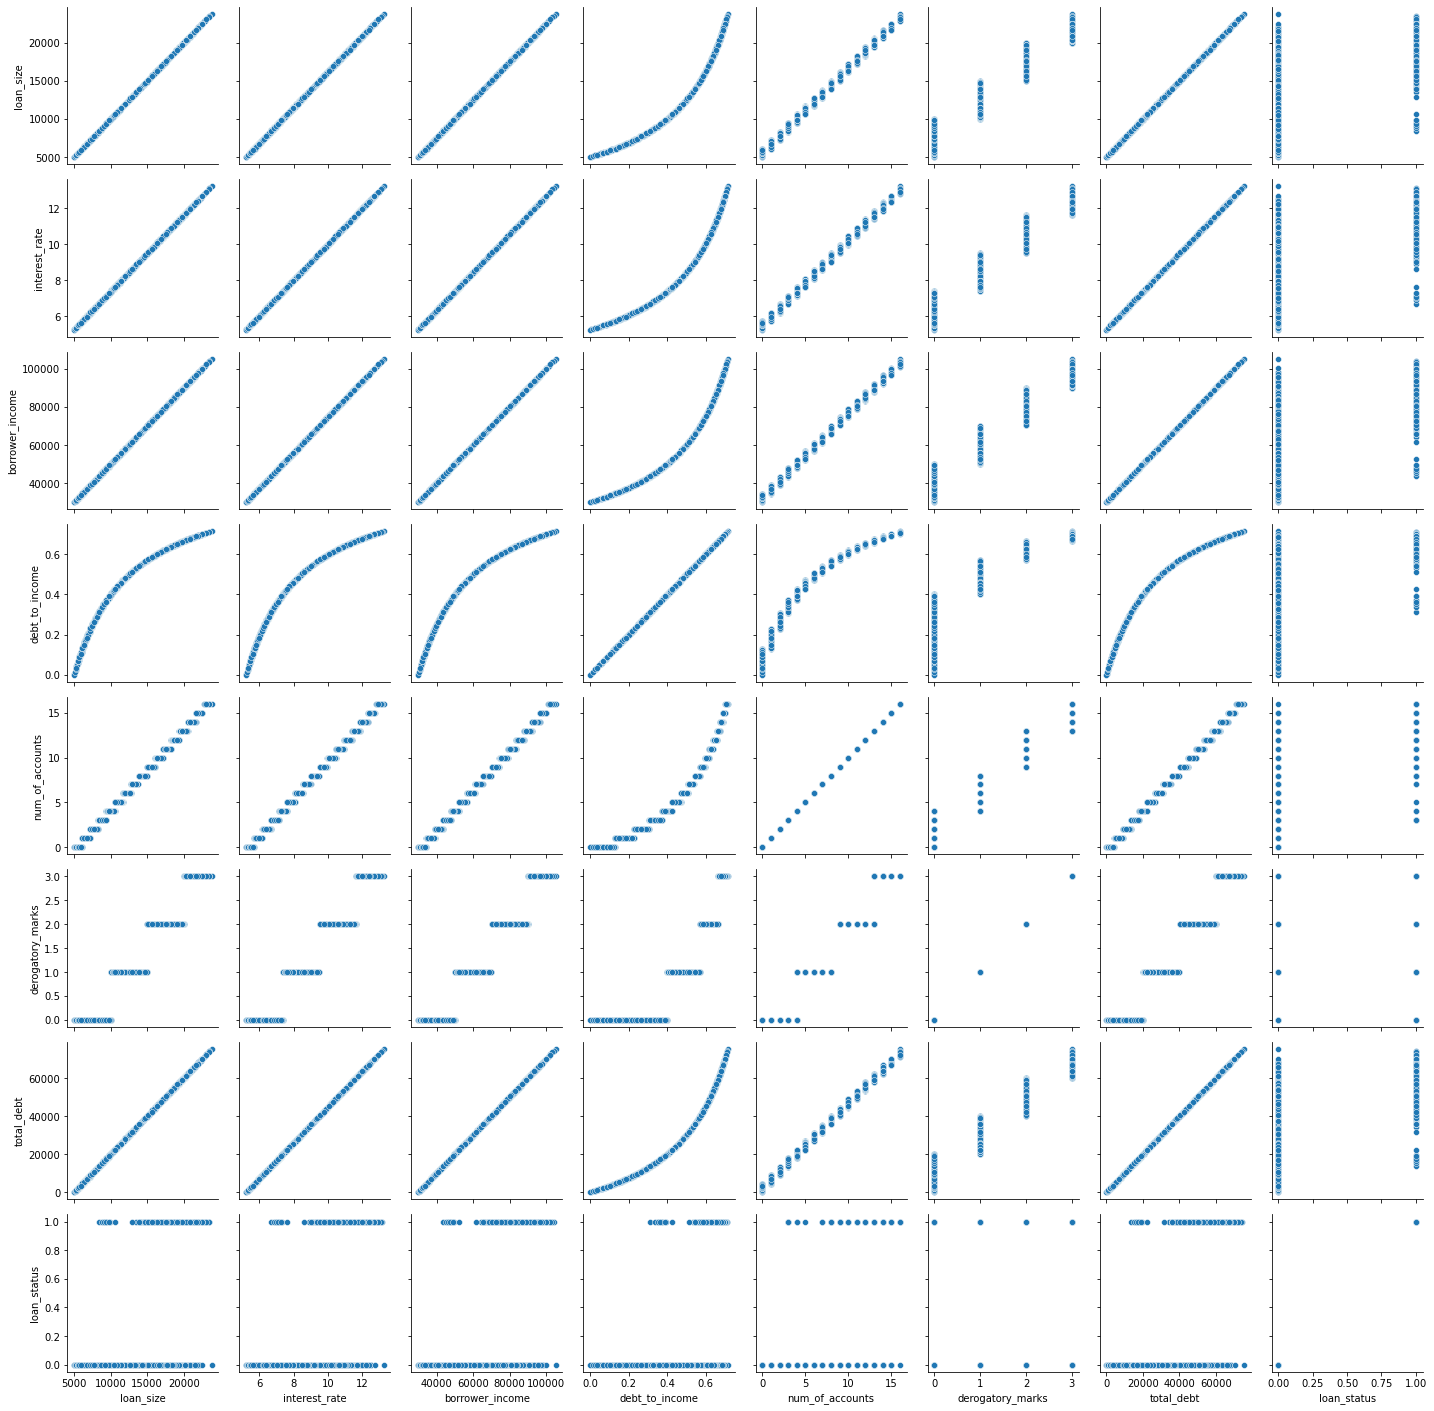

In [19]:
# Building structured multi-plot grids
g = sns.PairGrid(lending_data)
g.map(sns.scatterplot)

In [14]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)                                                  


### Logistic Regression Model 

In [27]:
# Train a Logistic Regression model print the model score
LogisticRegression(solver='lbfgs', random_state=1)

clf = LogisticRegression(solver='lbfgs', random_state=1)
clf.fit(X_train, y_train)
print(f"LogisticRegression Training Data Score: {clf.score(X_train, y_train)}")

print(f"LogisticRegression Testing Data Score:{clf.score(X_test, y_test)}")

LogisticRegression Training Data Score: 0.9919177328380795
LogisticRegression Testing Data Score:0.9924680148576145


## Random Forest Classifier

In [29]:
# Train a Random Forest Classifier model and print the model score 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9971970009629936
Testing Score: 0.991900536524969


In [23]:
# Print classification report for additional confirmation on performance of model
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.89      0.87       592

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384

